### Problem Statement:
For a given dataset of people with gender, age and genre of music that they prefer to listen to, You have to train a ML model, so that for a new person with a specific age and gender, your model will be able to predict what genre of music he/she will most likely prefer.

The dataset is shared in the csv format.
0 represents female and 1 represents male.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('music.csv')
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [3]:
df.shape

(18, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [5]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
df.columns

Index(['age', 'gender', 'genre'], dtype='object')

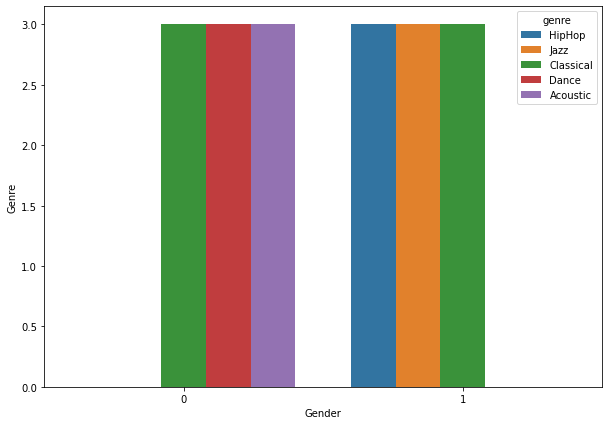

In [7]:
plt.figure(figsize=(10,7))
labels=['Female','Male']
sns.countplot(x='gender',hue='genre',data=df)
plt.xlabel('Gender')
plt.ylabel('Genre')
plt.show()

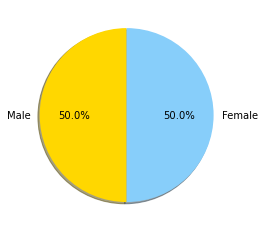

In [8]:
labels = ['Male','Female']
Values = df['gender'].value_counts().values
fig1,ax1 = plt.subplots()
colors = ['gold','lightskyblue']
ax1.pie(Values,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
genre_encoded= pd.DataFrame(le.fit_transform(df['genre']),columns=['genre_encoded'])
genre_encoded.head()

,genre_encoded
0,3
1,3
2,3
3,4
4,4


In [10]:
FinalDf =df.join(genre_encoded)

In [11]:
FinalDf.drop(['genre'],axis=1,inplace=True)
FinalDf.head()

,age,gender,genre_encoded
0,20,1,3
1,23,1,3
2,25,1,3
3,26,1,4
4,29,1,4


<AxesSubplot:>

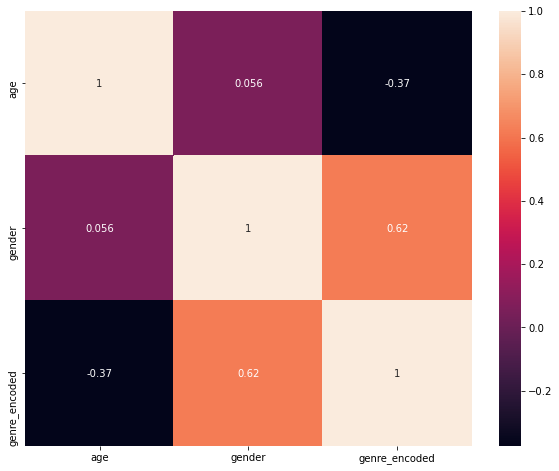

In [12]:
plt.figure(figsize = (10,8))
corr = FinalDf.corr()
sns.heatmap(corr,annot=True)

In [13]:
Feature = FinalDf[['age','gender']]
Target = FinalDf['genre_encoded']

In [14]:
#Train test split
X_train,X_test,Y_train,Y_test=train_test_split(Feature,Target,test_size= 0.25,random_state=1)

* Here, Given dependent variable is in Categrical form therefor I used Decision Tree Classifier and Support vector Classifier  model

### Decision Tree Classifier

In [15]:
#Creating Decision Tree Classifier
model = DecisionTreeClassifier()

#Fitting the model
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
#Predictions
Y_pred=model.predict(X_test)
Y_pred

array([1, 3, 0, 3, 0])

In [17]:
print(metrics.classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.75      0.62      0.67         5
weighted avg       1.00      0.80      0.87         5



In [18]:
#Find accurcy
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred)*100)

Accuracy: 80.0


### SVC

In [19]:
#Creating SVM regression
model = svm.SVC(kernel ='rbf')

#Fitting the model
model.fit(X_train,Y_train)

SVC()

In [20]:
#predicting from model
Y_pred=model.predict(X_test)

In [21]:
print(metrics.classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.20      0.07      0.10         5
weighted avg       0.60      0.20      0.30         5



In [22]:
#Find accurcy
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred)*100)

Accuracy: 20.0


* From above two model accuracy of Decision Tree Classifier is high as compaire to SVC. Therefore Decision Tree Classifier is perfect model for prediction